## 回家作業

### 資料位於
- https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv

|編號|題目|提示|
|----|----------|----|
|1.|使用Pandas 將資料讀取到一名為 df 的 DataFrame 中?|提示：使用 read_csv| 
|2.|請表列出該資料集的綱要(schema) ? |提示：使用 info| 
|3.|請表列出該資料集的敘述性統計 ? |提示：使用 describe|
|4.|請用列出資料型態為字串的欄位 ? |提示：dtypes: object|
|5.|請將特徵資料命名為 X , 目標(Exited) 資料命名為 Y?|提示：iloc| 
|6.|請使用邏輯式回歸(Logistic Regression) 針對特徵與目標建立一分類模型? |提示：ensemble|
|7.|繼第6題,請計算出模型準確度(Accuracy)?|提示：accuracy|
|8.|繼第6題,請計算出混淆矩陣(Confusion Matrix)? |提示：confusion_matrix|
|9.|請使用隨機森林(Random Forest) 針對特徵與目標建立一分類模型? |提示：ensemble|
|10.|請比較隨機森林與邏輯式迴歸三模型的AUC ? |提示：auc|

### 答案一

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv')

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 答案二

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 答案三

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 答案四

In [7]:
df.dtypes[df.dtypes == 'object']

Surname      object
Geography    object
Gender       object
dtype: object

In [9]:
df.select_dtypes('object').head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


### 答案五

In [11]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
geo = pandas.get_dummies(df['Geography'])
del geo['France']

In [14]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
gender = pandas.get_dummies(df['Gender'])
del gender['Female']

In [17]:
dataset = pandas.concat([df, geo, gender], axis = 1)

In [18]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
dataset = dataset.iloc[:,3:]

In [21]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [22]:
dataset.drop(['Geography', 'Gender'], axis = 1, inplace=True)

In [23]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [25]:
dataset.columns 

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany', 'Spain',
       'Male'],
      dtype='object')

In [26]:
X = dataset[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain',
       'Male']]
Y = dataset['Exited'].values

### 答案六

In [30]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,Y, test_size = 0.33, random_state = 42)

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(trainX,trainY)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
predicted = clf.predict(testX)

### 答案七

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(testY,predicted)

0.7996969696969697

### 答案八

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testY,predicted)

array([[2579,   78],
       [ 583,   60]], dtype=int64)

### 答案九

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
predicted = clf.predict(testX)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(testY,predicted)

0.8703030303030304

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testY,predicted)

array([[2561,   96],
       [ 332,  311]], dtype=int64)

### 答案十

In [42]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



clf1 = RandomForestClassifier(n_estimators=100, criterion="entropy")
clf1.fit(trainX, trainY)

clf2 = LogisticRegression()
clf2.fit(trainX, trainY)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


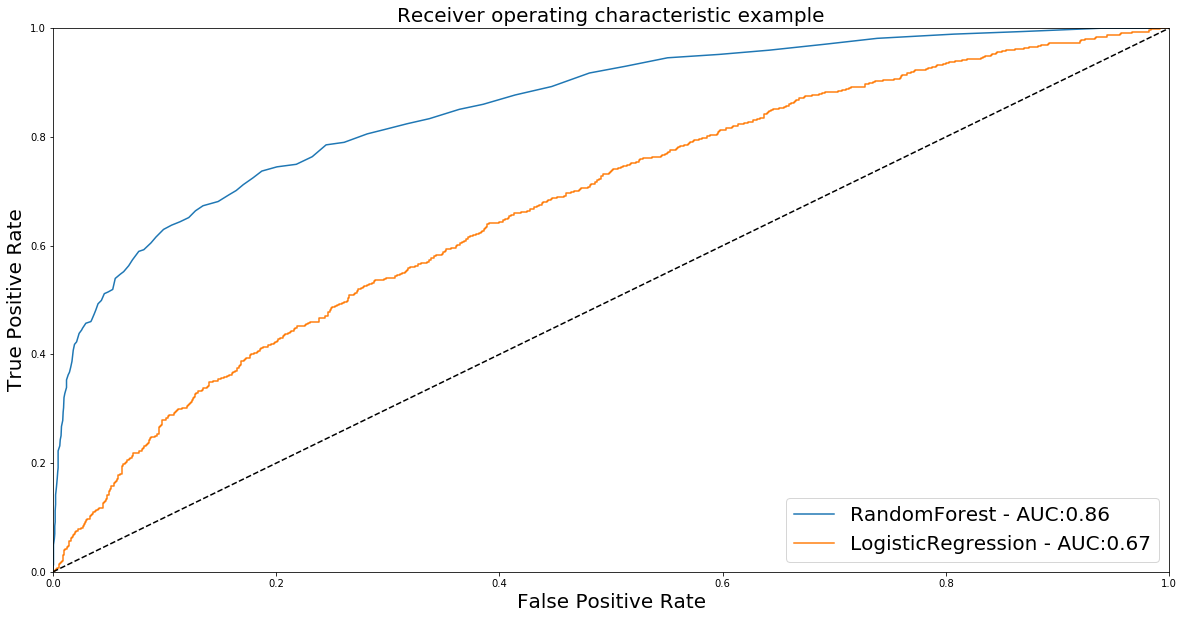

In [45]:
from sklearn.metrics import roc_curve, auc
from matplotlib  import pyplot as plt
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2], [ 'RandomForest', 'LogisticRegression']):
    probas_ = clf.fit(trainX, trainY).predict_proba(testX)
    fpr, tpr, thresholds = roc_curve(testY, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

In [54]:
a = testX.iloc[0,:].values
clf1.predict([a])

array([0], dtype=int64)

## 英文斷詞

In [46]:
a = 'this is a book'
a.split()

['this', 'is', 'a', 'book']

In [60]:
a = 'hi, my name is qoo. I love oop.'
# method 1
[ele.strip(',') for ele in a.split()]

# method 2
import re
w = re.split('[ ,]', a)
for i in range(0, len(w) -5 + 1):
    print(w[i:i+5])

['hi', '', 'my', 'name', 'is']
['', 'my', 'name', 'is', 'qoo.']
['my', 'name', 'is', 'qoo.', 'I']
['name', 'is', 'qoo.', 'I', 'love']
['is', 'qoo.', 'I', 'love', 'oop.']


## 中文斷詞

In [47]:
! pip install jieba

In [48]:
import jieba
seg_list = jieba.cut('酸民婉君也可以報名嗎?')

In [49]:
list(seg_list)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.002 seconds.
Prefix dict has been built succesfully.


['酸民婉君', '也', '可以', '報名', '嗎', '?']

## 正規表達法斷句

In [61]:
article = '''
〔即時新聞／綜合報導〕知名律師、政論節目主持人謝震武昨（24）日一反常態，在節目上狂轟國民黨總統參選人韓國瑜，引來熱議；不少韓粉搞錯對象，「出征」知名藝人謝祖武的臉書專頁，鬧出笑話。有網友KUSO惡搞，把謝震武、謝祖武的臉P到《雙子殺手》電影海報上，藉此諷刺韓粉「震武祖武分不清」。
'''

In [70]:
import re
re.split('[，；「」。、《》／〔〕（）]', article)

['\n',
 '即時新聞',
 '綜合報導',
 '知名律師',
 '政論節目主持人謝震武昨',
 '24',
 '日一反常態',
 '在節目上狂轟國民黨總統參選人韓國瑜',
 '引來熱議',
 '不少韓粉搞錯對象',
 '',
 '出征',
 '知名藝人謝祖武的臉書專頁',
 '鬧出笑話',
 '有網友KUSO惡搞',
 '把謝震武',
 '謝祖武的臉P到',
 '雙子殺手',
 '電影海報上',
 '藉此諷刺韓粉',
 '震武祖武分不清',
 '',
 '\n']

In [72]:
jieba.get_dict_file()

<_io.BufferedReader name='C:\\Users\\User\\Anaconda3\\lib\\site-packages\\jieba\\dict.txt'>

## Jieba 實戰

In [73]:
import jieba
seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？ 柯P否認")
seg_list

<generator object Tokenizer.cut at 0x0000019AF446D660>

In [74]:
list(seg_list)

['大', '巨蛋', '案對', '市府', '同仁', '下', '封口令', '？', ' ', '柯', 'P', '否認']

In [77]:
import jieba
seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？ 柯P否認", cut_all=True)
print(list(seg_list))

['大', '巨蛋', '案', '對', '市府', '同仁', '下', '封口', '封口令', '口令', '', '', '', '柯', 'P', '否', '認']


In [4]:
import jieba
jieba.load_userdict('userdict.txt')

In [5]:
seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？ 柯P否認")
list(seg_list)

['大巨蛋', '案對', '市府', '同仁', '下', '封口令', '？', ' ', '柯P', '否認']

In [6]:
article = '''知名律師、政論節目主持人謝震武昨（24）日一反常態，在節目上狂轟國民黨總統參選人韓國瑜，引來熱議；不少韓粉搞錯對象，「出征」知名藝人謝祖武的臉書專頁，鬧出笑話。有網友KUSO惡搞，把謝震武、謝祖武的臉P到《雙子殺手》電影海報上，藉此諷刺韓粉「震武祖武分不清」'''
seg_list = jieba.cut(article)
print(list(seg_list))

['知名', '律師', '、', '政論', '節目', '主持人', '謝震武', '昨', '（', '24', '）', '日', '一', '反常', '態', '，', '在', '節目', '上狂', '轟', '國民黨', '總統', '參選', '人', '韓國瑜', '，', '引來', '熱議', '；', '不少', '韓粉', '搞', '錯', '對象', '，', '「', '出征', '」', '知名', '藝人', '謝祖武', '的', '臉', '書專頁', '，', '鬧出', '笑話', '。', '有', '網友', 'KUSO', '惡', '搞', '，', '把', '謝震武', '、', '謝祖武', '的', '臉', 'P', '到', '《', '雙子', '殺手', '》', '電影', '海報', '上', '，', '藉此', '諷刺', '韓粉', '「', '震武', '祖武', '分不清', '」']


## Jieba ZH_TW
- https://github.com/ldkrsi/jieba-zh_TW

In [8]:
import jieba
import jieba.posseg as pseg
jieba.load_userdict('userdict.txt')
words = pseg.cut("大巨蛋案對市府同仁下封口令？ 柯P否認")
for w in words:
    print(w.word, w.flag)

大巨蛋 N
案 ng
對 p
市府 N
同仁 N
下 POST
封口令 n
？ x
  x
柯P N
否認 v


In [9]:
jieba.add_word('柯P',100,'nr')

In [10]:
words = pseg.cut("大巨蛋案對市府同仁下封口令？ 柯P否認")
for w in words:
    print(w.word, w.flag)

大巨蛋 N
案 ng
對 p
市府 N
同仁 N
下 POST
封口令 n
？ x
  x
柯P nr
否認 v


In [11]:
sentence = "大巨蛋案對市府同仁下封口令？ 柯P否認"
words = jieba.tokenize(sentence)
for tw in words:
    print(tw[0], tw[1], tw[2])

大巨蛋 0 3
案對 3 5
市府 5 7
同仁 7 9
下 9 10
封口令 10 13
？ 13 14
  14 15
柯P 15 17
否認 17 19


## 抓取新聞關鍵字詞

In [13]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://ent.ltn.com.tw/news/breakingnews/2958106')
#res.text

In [14]:
soup = BeautifulSoup(res.text, 'lxml')

In [19]:
kw = soup.select_one('meta[name="keywords"]').get('content')

In [23]:
with open('userdict.txt', 'a', encoding='utf-8') as f:
    f.write('\n')
    for ele in kw.split(','):
        f.write(ele.strip() + '\n')
    

## 其他斷詞系統

### CKIPTAGGER
- https://github.com/ckiplab/ckiptagger

## Spacy
- https://spacy.io/

## 文字量化

In [24]:
news = '''〔即時新聞／綜合報導〕知名律師、政論節目主持人謝震武昨（24）日一反常態，在節目上狂轟國民黨總統參選人韓國瑜，引來熱議；不少韓粉搞錯對象，「出征」知名藝人謝祖武的臉書專頁，鬧出笑話。有網友KUSO惡搞，把謝震武、謝祖武的臉P到《雙子殺手》電影海報上，藉此諷刺韓粉「震武祖武分不清」。

謝震武昨天在節目「新聞面對面」中，批評韓國瑜「高山設升旗台」、「故宮文物一次展出」等議題長達10分鐘，引起韓粉不滿，號召「出征」謝的粉絲專頁，但謝震武沒有成立臉書專頁，許多人因此搞錯目標，轉而灌向演員謝祖武臉書。

有人把謝震武、謝祖武的臉合成進《雙子殺手》電影海報，諷刺韓粉「震武祖武分不清」，並把導演介紹一欄改為「高雄市的虛幻漂流／驚相獎導演康安／最新慄作」。

「雙謝」電影海報在網路上瘋傳，引起網友共鳴，留言道「雙武攻瑜」、「這麼快，完成度又這麼高」、「我愛台灣鄉民」、「笑爛」、「震武、祖武，傻傻分不清楚」、「Key得也太好」。

國際導演李安新作《雙子殺手》近期在台灣上映。片中，好萊塢巨星威爾史密斯分飾兩角，分別是不同年齡的「自己」，互相肉搏、尬重機，上演「自己對自己」的槍擊戰。'''

In [26]:
import jieba
from collections import Counter
c = Counter([w for w in list(jieba.cut(news)) if len(w) >=2])
c.most_common(10)

[('謝震武', 5),
 ('韓粉', 4),
 ('謝祖武', 4),
 ('節目', 3),
 ('雙子', 3),
 ('殺手', 3),
 ('電影', 3),
 ('海報', 3),
 ('震武', 3),
 ('祖武', 3)]

## WordCloud
- https://amueller.github.io/word_cloud/

In [27]:
! pip install wordcloud

In [34]:
ttf = 'C:\\Users\\User\\Anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\NotoSansCJKtc-Bold.otf'

Populating the interactive namespace from numpy and matplotlib


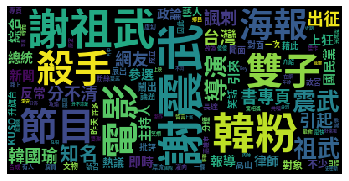

In [36]:
%pylab inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wc = WordCloud(
  background_color='black',        #   背景顏色
  max_words=200,                   #   最大分詞數量
  mask=None,                       #   背景圖片
  max_font_size=None,              #   顯示字體的最大值
  stopwords=['自己'],   #   使用內置的屏蔽詞，再添加一個
  font_path=ttf,             #   若為中文則需引入中文字型(.TTF)
  random_state=None,               #   隨機碼生成各分詞顏色
  prefer_horizontal=0.9)           #   調整分詞中水平和垂直的比例

seg_list = ' '.join([w for w in list(jieba.cut(news)) if len(w) >=2])
wc.generate(seg_list)              #   須為字串且每個分詞以空白相隔

import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis("off")
plt.show()

## TFIDF

In [38]:
a, abb,abc = ['a'], ['a', 'b', 'b'], ['a','b','c']
D = [a,abb,abc]

In [39]:
import math
#tfidf('a', a, D)
tf = 1/1
idf =  math.log(3/3)
tf * idf

0.0

In [40]:
#tfidf('a', abb, D)
tf = 1/3
idf =  math.log(3/3)
tf * idf

0.0

In [41]:
#tfidf('b', abb, D)
tf = 2/3
idf =  math.log(3/2)
tf * idf

0.27031007207210955

In [42]:
#tfidf('a', abc, D)
tf = 1/3
idf =  math.log(3/3)
tf * idf

0.0

In [43]:
#tfidf('b', abc, D)
tf = 1/3
idf =  math.log(3/2)
tf * idf

0.13515503603605478

In [45]:
#tfidf('c', abc, D)
tf = 1/3
idf = math.log(3/1)
tf * idf

0.3662040962227032

In [46]:
def tfidf(t, d, D):
    tf = d.count(t) / len(d)
    idf = math.log(len(D)/len([D for doc in D if t in doc]))
    return tf * idf

In [47]:
tfidf('a', a, D)

0.0

In [48]:
tfidf('a', abb, D)

0.0

In [49]:
tfidf('a', abc, D)

0.0

In [50]:
tfidf('b', abb, D)

0.27031007207210955

In [51]:
tfidf('b', abc, D)

0.13515503603605478

In [52]:
tfidf('c', abc, D)

0.3662040962227032

In [55]:
from jieba.analyse import extract_tags
extract_tags(news, topK = 10)

['謝震武', '韓粉', '謝祖武', '節目', '雙子', '殺手', '電影', '海報', '震武', '祖武']

## 詞頻矩陣

In [57]:
a = ['this is a book', 'this is a car']
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(a)

In [58]:
X

<2x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [60]:
print(vectorizer.get_feature_names())

['book', 'car', 'is', 'this']


In [59]:
X.toarray()

array([[1, 0, 1, 1],
       [0, 1, 1, 1]], dtype=int64)

In [65]:
import jieba
jieba.load_userdict('userdict.txt')
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文 今處理',
       '留洪智坤 柯：殘障求職不易',
       '人事處議處洪智坤 柯P：不清楚議處結果']


corpus = []
for title in ary:
    corpus.append(' '.join(jieba.cut(title)))

In [66]:
corpus

['【 更新 】 柯P ： 洪智坤 洩漏 公文 案 還 沒 看到 公文   今 處理',
 '留 洪智坤   柯 ： 殘障 求職 不易',
 '人事處 議處 洪智坤   柯P ： 不 清楚 議處 結果']

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=['不易'])
X = vectorizer.fit_transform(corpus)

In [69]:
X

<3x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [72]:
print(vectorizer.get_feature_names())

['人事處', '公文', '更新', '柯p', '殘障', '求職', '洩漏', '洪智坤', '清楚', '看到', '結果', '處理', '議處']


In [70]:
X.toarray()

array([[0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2]], dtype=int64)

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=['不易'])
X = vectorizer.fit_transform(corpus)

In [74]:
X.toarray()

array([[0.        , 0.66937843, 0.33468921, 0.25453977, 0.        ,
        0.        , 0.33468921, 0.19767284, 0.        , 0.33468921,
        0.        , 0.33468921, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.65249088,
        0.65249088, 0.        , 0.38537163, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.35517252, 0.        , 0.        , 0.27011786, 0.        ,
        0.        , 0.        , 0.20977061, 0.35517252, 0.        ,
        0.35517252, 0.        , 0.71034504]])

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=['不易'])
X = vectorizer.fit_transform(corpus)

In [78]:
X.toarray()

array([[0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2]], dtype=int64)

In [82]:
math.sqrt(((X[0] -X[1]).toarray() ** 2).sum())

3.3166247903554

In [83]:
math.sqrt(((X[0] -X[2]).toarray() ** 2).sum())

3.872983346207417

In [84]:
import jieba
jieba.load_userdict('userdict.txt')
ary = ['世界大賽Live》太空人牛棚守成 4：1擊敗國民',
       '知名律師、政論節目主持人謝震武昨（24）日一反常態，在節目上狂轟國民黨總統參選人韓國瑜，引來熱議；不少韓粉搞錯對象，「出征」知名藝人謝祖武的臉書專頁，鬧出笑話。有網友KUSO惡搞，把謝震武、謝祖武的臉P到《雙子殺手》電影海報上，藉此諷刺韓粉「震武祖武分不清」',
       '雙子殺手！謝震武、謝祖武分不清？ 這張圖被推爆']


corpus = []
for title in ary:
    corpus.append(' '.join(jieba.cut(title)))

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [86]:
X

<3x45 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [87]:
math.sqrt(((X[0] -X[1]).toarray() ** 2).sum())

7.615773105863909

In [88]:
math.sqrt(((X[0] -X[2]).toarray() ** 2).sum())

3.872983346207417

In [89]:
math.sqrt(((X[1] -X[2]).toarray() ** 2).sum())

6.557438524302

In [93]:
(X[0].toarray()  * X[1].toarray()).sum() / (math.sqrt((X[0].toarray() ** 2).sum()) *  math.sqrt((X[1].toarray() ** 2).sum()))

0.0

In [94]:
(X[1].toarray()  * X[2].toarray()).sum() / (math.sqrt((X[1].toarray() ** 2).sum()) *  math.sqrt((X[2].toarray() ** 2).sum()))

0.3741657386773941

In [96]:
ary

['世界大賽Live》太空人牛棚守成 4：1擊敗國民',
 '知名律師、政論節目主持人謝震武昨（24）日一反常態，在節目上狂轟國民黨總統參選人韓國瑜，引來熱議；不少韓粉搞錯對象，「出征」知名藝人謝祖武的臉書專頁，鬧出笑話。有網友KUSO惡搞，把謝震武、謝祖武的臉P到《雙子殺手》電影海報上，藉此諷刺韓粉「震武祖武分不清」',
 '雙子殺手！謝震武、謝祖武分不清？ 這張圖被推爆']

In [95]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, cosine_similarity
d1 = euclidean_distances(X)
d1

array([[0.        , 7.61577311, 3.87298335],
       [7.61577311, 0.        , 6.55743852],
       [3.87298335, 6.55743852, 0.        ]])

In [97]:
d2 = cosine_distances(X)
d2

array([[0.        , 1.        , 1.        ],
       [1.        , 0.        , 0.62583426],
       [1.        , 0.62583426, 0.        ]])

In [98]:
d3 = cosine_similarity(X)
d3

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.37416574],
       [0.        , 0.37416574, 1.        ]])

## 計算文章相似度

In [101]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/20190720appledaily.xlsx', index_col = 0)

In [102]:
news.head()

,content,title
0,(更新:新增影片)韓國瑜夫妻昨遭專欄作家曾韋禎指控，除違建農舍外另擁房產多處，其中在雲林斗六...,【蘋果查真相】找到了！ 韓國瑜家族千萬電梯豪墅是這兩棟
1,清華大學日前發布公告表示為維護校園安全，原定今起試辦「送餐飲機車僅能於用餐時段入校執行送餐飲...,非用餐時段外送機車禁入校引熱議 清大生當記者拍專題探討
2,內政部長徐國勇昨赴高雄市警局，了解明年大選的查賄制暴工作，指高雄是重中之重；高雄市長韓國瑜質...,槓上韓國瑜 徐國勇：應專心市政及防災
3,總統蔡英文出訪加勒比海友邦，回程過境美國丹佛，抵達下榻飯店後，先後與在地選區的參議員賈德納（...,【過境丹佛】蔡英文過境丹佛 參議員賈德納讚美台關係史上最好
4,日本動畫製作公司「京都動畫」遭人縱火釀34死35傷慘劇，41歲犯嫌青葉真司曾向警方表示，因小...,縱火犯指控盜用小說 京都動畫社長澄清未收過投稿


In [104]:
news.dropna(inplace=True)

In [105]:
corpus = []
titles = []
for idx, rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec['content'])))
    titles.append(rec['title'])

In [107]:
#corpus[0]

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [109]:
X

<1566x57778 sparse matrix of type '<class 'numpy.int64'>'
	with 241127 stored elements in Compressed Sparse Row format>

In [110]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [111]:
cs.shape

(1566, 1566)

In [112]:
cs[0]

array([0.        , 0.98153177, 0.951496  , ..., 0.98895496, 0.98014828,
       0.92938018])

In [113]:
import numpy as np
a = np.array([50,60,70,40,80])
a.argsort()

array([3, 0, 1, 2, 4], dtype=int64)

In [115]:
cs[0].argsort()[1:11]

array([ 203,  278,  451,   94,  509,  257,  939,  387,   78, 1334],
      dtype=int64)

In [117]:
titles[0]

'【蘋果查真相】找到了！\u3000韓國瑜家族千萬電梯豪墅是這兩棟'

In [119]:
for i in cs[0].argsort()[1:11]:
    print(titles[i], cs[0][i])

韓國瑜被爆「墅民」非庶民！擁千萬電梯豪宅　投資建設公司 0.28403531259035075
韓國瑜被爆擁五車位電梯別墅　作家揭密：建商還是李佳芬姊弟 0.49582878857869817
韓國瑜財產看這邊！存款4599萬、別墅143坪 0.5688028405951444
【枕邊權貴】韓國瑜岳家縱橫雲林政壇33年　家族議員9連霸無縫接軌 0.6964420369938056
20萬筆個資遭洩　1111人力銀行稱有幫會員投保 0.82722836103799
【韓國瑜違建】古坑公所會勘「聲東擊西」　屋內人撐傘潑水擋拍攝 0.8478131439287901
名譽是第二生命！翁啟惠浩鼎案無罪卻被判申誡　提再審遭駁回 0.8523316117955724
1111人力銀行20萬筆個資遭洩　《蘋果》電話實測「個資是真的」 0.852702200580386
【一周蘋選10大新聞】藍總統初選韓國瑜出線　蕭亞軒恍惚喊「我想我小孩」 0.8551467956767616
昨切割韓市長與韓總統　高市府活動今喊：神賀高票當選 0.8575452055307315


In [122]:
def getSimiliarArticle(newsid):
    print('查詢新聞:',titles[newsid])
    for i in cs[newsid].argsort()[1:]:
        if cs[newsid][i] < 0.8:
            print('相關新聞:',titles[i], cs[newsid][i])

In [131]:
getSimiliarArticle(7)

查詢新聞: 英卡那西歐轉隊首發滿貫　洋基8比2宰落磯
相關新聞: 【MLB報馬仔】田中將大先發主場猛　推洋基過關 0.6477365062021191
相關新聞: 【MLB】烏謝拉開轟　洋基賀曼12勝並列勝投王 0.6770939878495186
相關新聞: 大谷翔平2安帶勝利打點　天使宰太空人5連勝 0.7450615107977215
相關新聞: 馬林魚的奇蹟　山本喬登奪4勝保持不敗 0.7578389475810737


## 自動問答機器人

In [132]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.foodpanda.com.tw/contents/contact.htm')
soup = BeautifulSoup(res.text, 'lxml')

In [136]:
questions = [ele.text for ele in soup.select('.col-md-8 strong')]

In [137]:
answers = [ele.text for ele in soup.select('.col-md-8 .comment')]

In [140]:
len(questions), len(answers)

(26, 26)

In [141]:
corpus = []
q_ary = []
a_ary = []
for q,a in zip(questions, answers):
    corpus.append(' '.join(jieba.cut(q)))
    q_ary.append(q)
    a_ary.append(a)

In [142]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [143]:
user_questions = input('請輸入你的問題:')

請輸入你的問題:為什麼我的餐點還沒來?


In [152]:
user_corpus =[' '.join(jieba.cut(user_questions))]
Y = vectorizer.transform(user_corpus)
pos = cosine_distances(Y,X).flatten().argsort()[0]
print('你問的問題是不是:', q_ary[pos])
print('我們的解答是:', a_ary[pos])

你問的問題是不是: 我的餐點怎麼還沒到？ 
我們的解答是: 通常餐點將會依照您收到的確認通知上的時間送達。由於餐廳備餐時間、路況、天候等因素影響，每張訂單送達時間不一定會與網站上的預估送達時間相同，送達時間依照網頁或APP顯示為主。foodpanda一向竭盡所能將餐點盡快送到您的手上，但有時餐廳需要較長的時間備餐，或路況不佳、天候不佳影響外送速度，可能會有延誤送達的情況，如果延誤得太久，請您直接與我們聯繫，我們立即會為您查詢當下的餐點配送狀況。


In [153]:
title = '怒飆韓國瑜10分鐘引熱議 謝震武霸氣回應了！'
content = '''〔即時新聞／綜合報導〕知名律師、主持人謝震武24日在節目上批評國民黨總統參選人韓國瑜10分鐘之久，引發外界熱議；對此，謝震武今（25）日在播出的節目中霸氣回應，「我自豪的就是主持政論節目」，他希望能對國內所有的政治人物能夠提出一些的諍言，「這是我們應該做的職責」。謝震武也直接在節目中表示，未來會直接邀請韓國瑜與蔡英文，到節目中和大家說明。

對於謝震武昨日在節目上提出批評，韓辦今日回應表示，非常感謝謝律師的建議指教，謝律師長期主持政論節目，對政治有深入觀察，相信謝律師也願意花時間深入了解韓市長的詳細政策內容。「一言興邦，一言喪國」這句話，也想送給現任的國家元首，在陳同佳案髮夾彎、邦交國連斷7國的情況下，希望蔡總統也要將這句話時刻放在心中。

對於韓辦表示「一言興邦，一言喪國」這句話，也想送給現任的國家元首蔡英文，謝震武表示，「我同意」！謝震武認為，在「私菸」事件，以及昨日內政部長徐國勇當場怒批媒體記者的事件中，用字遣詞的確有可議之處，因為在野黨也的確有資格可以問。謝震武指出，長期以來都希望，節目是能讓來賓將政治上能夠說服民眾的東西，全部拿出來講，他也對蔡英文政府提出忠告，針對「一言興邦，一言喪國」這句話，當然要時時刻刻銘記在心。

謝震武認為，韓競辦這次的回應是「成熟的」，對小英陣營來說，「要非常的謹慎，因為他們（韓陣營）可以分辨得出來，到底是不是謾罵」，謝震武也強調「我從不做這樣的事（謾罵）」。他也霸氣地說「我是國內目前最資深的政論節目主持人，我拿了六屆最受信任主持人獎，我希望能對國內所有的政治人物能夠提出一些的諍言，這是我們應該做的職責」。

最後，謝震武也直接在節目中表示，未來會直接邀請韓國瑜、總統蔡英文到節目和大家說明，到時候會和韓陣營聯絡。'''


In [169]:
import requests
def getNews(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml')
    title = soup.select_one('h1').text
    content = soup.select_one('.text.boxTitle.boxText').text.split('var')[0].strip()
    return title, content

In [180]:
title, content = getNews('https://news.ltn.com.tw/news/politics/breakingnews/2958223')

In [181]:
corpus = []
for paragraph in content.split('\n'):
    corpus.append(' '.join(jieba.cut(paragraph)))

In [182]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [183]:
title_corpus =[' '.join(jieba.cut(title))]
Y = vectorizer.transform(title_corpus)
pos = cosine_distances(Y,X).flatten().argsort()[0]
paragraphs = content.split('\n')
paragraphs[pos]

'〔記者張聰秋／彰化報導〕前立法院長王金平44年立委生涯，昨透過最後一次總質詢精彩謝幕，今天，他的公開行程就是參加國立彰化師範大學王金平活動中心落成啟用典禮，被問及離開立法院後是否繼續堅定朝總統府之路邁進，王金平說，他參選下屆總統的心從來沒有變過，「我參選到底！」前進總統府的這條路就是為了中華民國、為台灣呀！媒體問王金平，對於親民黨主席宋楚瑜那邊已有挺王派的聲音，希望推薦王金平參選下屆總統，王金平笑著回說，他沒有聽說。媒體又問，因為挺王派希望由王金平代表親民黨出征，若此聲音成真呢？王金平回答說，「成真的話到時候再說呀！」請繼續往下閱讀... '

## 新聞分群

In [186]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/1435449602.xml')
soup = BeautifulSoup(res.text, 'xml')

In [188]:
corpus = []
titles = []

for item in soup.select('item'):
    title = item.select_one('title').text
    description = item.select_one('description').text
    titles.append(title)
    corpus.append(' '.join(jieba.cut(description)))

In [189]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [190]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [191]:
cs.shape

(147, 147)

In [201]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
k = kmeans.fit_predict(cs)

In [202]:
k

array([1, 1, 2, 2, 1, 3, 1, 3, 3, 2, 2, 1, 0, 3, 4, 2, 1, 3, 3, 2, 2, 1,
       2, 3, 0, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 4, 0, 3, 1, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 0, 2, 3, 1,
       1, 1, 2, 1, 0, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 3, 3, 3,
       4, 4, 1, 2, 0, 3, 4, 1, 1, 4, 1, 4, 3, 1, 4, 4, 4, 1, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 1, 1, 4, 4])

In [203]:
import numpy as np
np_titles = np.array(titles)

In [209]:
for ele in np_titles[k==4]:
    print(ele)

蔡依林淚奪金曲 錦榮傳訊恭喜
陳奕迅、莫文蔚伴侶均不知阿娜答金曲獲獎
金曲26／蔡依林擒３獎大勝　淚崩再挺婚姻平權
金曲26／張惠妹奪歌后卻失落　要世界感受彩虹力量
金曲26／蔡依林淚奪最佳專輯＋完整得獎名單
僅次Jolin！徐佳瑩入圍6獎全槓被封遺珠
金曲最風光！蔡依林紅毯全勝又獲3獎成大贏家
張惠妹3度封后  想破江蕙紀錄
金曲26／陳奕迅稱王謝台灣　張惠妹封后秒噴淚
蔡依林呸大贏家  金曲最佳專輯獎
陳奕迅二度打敗歌神  金曲歌王好嗨
第26屆金曲獎 陳奕迅奪歌王、阿妹封歌后
金曲最佳國語專輯：呸
《金曲26》2015金曲獎得獎名單 線上直播懶人包


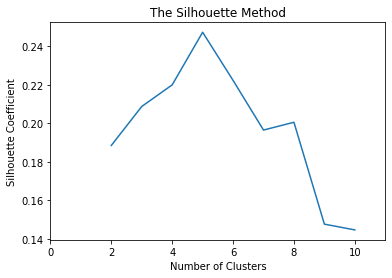

In [211]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(cs)
    sil.append(silhouette_score(cs, y_kmeans))
plt.plot(range(2, 11), sil)
plt.xlim([0,11])
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

## PyAutoGUI
- https://pypi.org/project/PyAutoGUI/
- https://www.youtube.com/watch?v=WMbqkaVYs9w

In [212]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/20190720appledaily.xlsx', index_col = 0)

In [215]:
news.dropna(inplace=True)

In [216]:
corpus = []
titles = []
for idx, rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec['content'])))
    titles.append(rec['title'])

In [218]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [220]:
cs = cosine_distances(X)

In [224]:
kmeans = KMeans(n_clusters= 20,init='k-means++', random_state=42)

In [225]:
k = kmeans.fit_predict(cs)

In [226]:
np_titles = np.array(titles)

In [233]:
#for rec in np_titles[k ==5]:
#    print(rec)

20
21
22
23
24
25
26
27
28
29


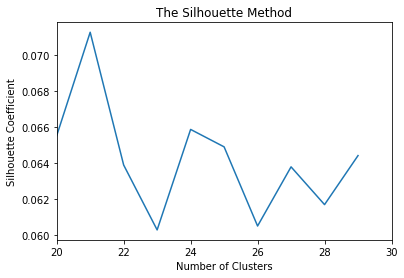

In [236]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
sil = []
for i in range(20, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(cs)
    sil.append(silhouette_score(cs, y_kmeans))
    print(i)
plt.plot(range(20, 30), sil)
plt.xlim([20,30])
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

## Networkx

In [237]:
import networkx as nx

In [238]:
G = nx.Graph()

In [239]:
G.add_node('A')
G.add_node('B')
G.add_node('C')

In [240]:
G.add_edge('A', 'B')
G.add_edge('A', 'C')

C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


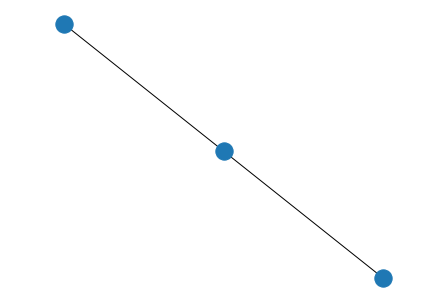

In [241]:
nx.draw(G)

In [242]:
nx.to_numpy_array(G)

array([[0., 1., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [257]:
m = (cs < 0.5).astype(int)

In [258]:
G = nx.from_numpy_array(m)

## Community Detection

In [250]:
! pip install python-louvain

  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\f9\74\a9\14f051b00dddd46d71529db15507796da13a43ee2c0bc39def
Successfully built python-louvain


In [259]:
import community
k = community.best_partition(G)

In [260]:
len(set(list(k.values())))

1354

In [279]:
from collections import Counter
cluster_ary = np.array(list(k.values()) )
c = Counter(cluster_ary)
c.most_common(10)

[(162, 18),
 (70, 17),
 (106, 16),
 (4, 15),
 (193, 8),
 (25, 6),
 (166, 6),
 (118, 5),
 (412, 4),
 (496, 4)]

In [273]:
np_titles = np.array(titles)

In [285]:
for rec in np_titles[cluster_ary == 193]:
    print(rec)

【港爭民主】抵台尋庇護「身上只有幾千元」　示威者憂香港變人治
30名闖立法會港人來台尋求庇護　移民署：尚未收到申請
港60名7.1佔領立法會青年　赴台求庇護
港生​反送中暫避台灣尋求庇護　蔡英文：會基於人道做適當處理
逾30名7.1佔領立法會示威者　抵台灣尋庇護
陸委會：港人若因政治因素受害　政府會提供必要協助
香港示威者來台尋求庇護　我「難民法」仍躺立院無法源協助
香港示威者來台尋求庇護　我「難民法」仍躺立院無法源協助


In [290]:
features = np.array(vectorizer.get_feature_names())

In [289]:
X[cluster_ary == 193].sum(axis = 0)

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [291]:
pos = np.squeeze(np.asarray(X[cluster_ary == 193].sum(axis = 0))).argsort()[::-1]

In [294]:
features[pos[0:10]]

array(['香港', '示威者', '台灣', '相關', '庇護', '尋求', '立法', '協助', '表示', '條例'],
      dtype='<U17')

In [296]:
for k, v in c.most_common(10):
    print('代表文章:', np_titles[cluster_ary == k][0])
    pos = np.squeeze(np.asarray(X[cluster_ary == k].sum(axis = 0))).argsort()[::-1]
    print('相關字:',features[pos[0:10]])
    print('========================================|')

代表文章: 11萬人升級壹會員　《蘋果》尊榮權益獻給您
相關字: ['蘋果' '會員' '聞網' '升級' '訂閱' '付費' '10' '服務' '新聞' 'ans']
========================================|
代表文章: 降雨稍緩南台灣仍須防豪雨　大台北高溫上看36℃
相關字: ['颱風' '氣象' '影響' '丹娜絲' '地區' '可能' '大雨' '台灣' '警報' '中南部']
========================================|
代表文章: 旺中大動作提告　學者羅承宗：新聞自由不是遮羞布
相關字: ['媒體' '報導' '時報' '新聞' '集團' '金融' '中國' '旺中' '台灣' '自由']
========================================|
代表文章: 縱火犯指控盜用小說　京都動畫社長澄清未收過投稿
相關字: ['動畫' '京都' '男子' '警方' '日本' '公司' '表示' '作品' '縱火' '製作']
========================================|
代表文章: 【港爭民主】抵台尋庇護「身上只有幾千元」　示威者憂香港變人治
相關字: ['香港' '示威者' '台灣' '相關' '庇護' '尋求' '立法' '協助' '表示' '條例']
========================================|
代表文章: 「非常多人討厭她」　妖西預言：蔡英文2020的票會很難看
相關字: ['立委' '喜樂島' '聯盟' '民進黨' '獨派' '英文' '總統' '組黨' '推出' '喜樂']
========================================|
代表文章: 9月1日止　新聞吃到飽　獨家菜色看這裡
相關字: ['com' 'tw' 'appledaily' 'https' '獨家' 'realtime' '蘋果' '踢爆' 'news' '韓國瑜']
========================================|
代表文章: 水貨客在香港橫行　BBC：中國經濟模式遇上瓶頸
相關字: ['香港' '中國' '經濟' '北京' '國際' '成長

## 新聞分類

In [299]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/pytextmining/master/data/20171214news.xlsx', index_col = 0)

In [301]:
corpus = []
tags   = []
titles = []
for idx, rec in news[news['category'].isin(['社會', '娛樂'])].iterrows():
    corpus.append(' '.join(jieba.cut(rec['content'])))
    titles.append(rec['title'])
    tags.append(rec['category'])

In [302]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [303]:
from sklearn.model_selection import train_test_split
train_titles, test_titles, train_X, test_X, train_y, test_y=train_test_split(titles, X, tags, test_size = 0.2, random_state = 42 )

In [304]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(train_X, train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [306]:
predicted = clf.predict(test_X)

In [307]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)

1.0

In [309]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(clf.classes_)
confusion_matrix(test_y, predicted)

['娛樂' '社會']


array([[22,  0],
       [ 0, 28]], dtype=int64)

In [310]:
import operator
coef_features_c1_c2 = []

for index, features in enumerate(zip(vectorizer.get_feature_names(), 
                                     clf.feature_count_[0], 
                                     clf.feature_count_[1])):
    feat,c1,c2 = features
    coef_features_c1_c2.append(tuple([c1/(c2 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = lambda k: k[0], reverse=True)[0:20]:
    print(i)

(22.0, '演出', 22.0, 0.0)
(20.0, '妙禪', 20.0, 0.0)
(18.0, '何家', 18.0, 0.0)
(17.0, '節目', 17.0, 0.0)
(15.0, '女星', 15.0, 0.0)
(15.0, '拍攝', 15.0, 0.0)
(14.0, '電影', 14.0, 0.0)
(13.076923076923077, '小嫻', 170.0, 12.0)
(13.0, 'mv', 13.0, 0.0)
(13.0, '婆婆', 26.0, 1.0)
(13.0, '媽寶', 13.0, 0.0)
(13.0, '最佳', 13.0, 0.0)
(12.0, '明年', 12.0, 0.0)
(12.0, '法國', 12.0, 0.0)
(11.0, '娛樂', 11.0, 0.0)
(11.0, '守正', 22.0, 1.0)
(11.0, '導演', 11.0, 0.0)
(11.0, '巴黎', 11.0, 0.0)
(10.0, 'jj', 10.0, 0.0)
(10.0, '三姊', 10.0, 0.0)


In [311]:
import operator
coef_features_c1_c2 = []

for index, features in enumerate(zip(vectorizer.get_feature_names(), 
                                     clf.feature_count_[0], 
                                     clf.feature_count_[1])):
    feat,c1,c2 = features
    coef_features_c1_c2.append(tuple([c2/(c1 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = lambda k: k[0], reverse=True)[0:20]:
    print(i)

(77.0, '男子', 0.0, 77.0)
(47.0, '突發', 0.0, 47.0)
(43.0, '警員', 0.0, 43.0)
(38.0, '新北', 0.0, 38.0)
(36.0, '機車', 0.0, 36.0)
(35.0, '少年', 0.0, 35.0)
(33.6, '警方', 4.0, 168.0)
(33.0, '檢方', 0.0, 33.0)
(32.0, '時許', 0.0, 32.0)
(32.0, '法官', 0.0, 32.0)
(32.0, '派出所', 0.0, 32.0)
(31.0, '江男', 0.0, 31.0)
(29.0, '警消', 0.0, 29.0)
(28.0, '分局', 0.0, 28.0)
(28.0, '詐騙', 0.0, 28.0)
(27.0, '消防局', 0.0, 27.0)
(27.0, '警察', 0.0, 27.0)
(27.0, '釐清', 0.0, 27.0)
(26.0, '到場', 0.0, 26.0)
(26.0, '張男', 0.0, 26.0)


In [312]:
corpus = []
tags   = []
titles = []
for idx, rec in news[news['category'].isin(['社會', '娛樂', '國際'])].iterrows():
    corpus.append(' '.join(jieba.cut(rec['content'])))
    titles.append(rec['title'])
    tags.append(rec['category'])

In [313]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [314]:
from sklearn.model_selection import train_test_split
train_titles, test_titles, train_X, test_X, train_y, test_y=train_test_split(titles, X, tags, test_size = 0.2, random_state = 42 )

In [315]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(train_X, train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [316]:
predicted = clf.predict(test_X)

In [317]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)

0.9333333333333333

In [319]:
print(clf.classes_)
confusion_matrix(test_y, predicted)

['國際' '娛樂' '社會']


array([[25,  0,  3],
       [ 2, 18,  0],
       [ 0,  0, 27]], dtype=int64)